Build a model based on the data you have scraped. Don't worry if the model is far from perfect. You can always improve later. The most important thing is your story, you can answer the following questions after you finish modeling.

In [78]:
import pandas as pd

df = pd.read_csv('../data/Hotel Reservations.csv')

In [111]:
#Loading libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report


# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_regression, f_classif
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectPercentile, chi2

from sklearn.metrics import confusion_matrix


from sklearn.compose import make_column_selector as selector

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [25]:
df.head().T

,0,1,2,3,4
Booking_ID,INN00001,INN00002,INN00003,INN00004,INN00005
no_of_adults,2,2,1,2,2
no_of_children,0,0,0,0,0
no_of_weekend_nights,1,2,2,0,1
no_of_week_nights,2,3,1,2,1
type_of_meal_plan,Meal Plan 1,Not Selected,Meal Plan 1,Meal Plan 1,Not Selected
required_car_parking_space,0,0,0,0,0
room_type_reserved,Room_Type 1,Room_Type 1,Room_Type 1,Room_Type 1,Room_Type 1
lead_time,224,5,1,211,48
arrival_year,2017,2018,2018,2018,2018


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [7]:
# Distribution of booking_status by month
#fig = plt.figure(figsize=(15,10))
#sns.countplot(x ='arrival_month', data= df, hue='booking_status').set_title('Distrinution of Booking Status ');


In [79]:
tmp_mask = (df['arrival_month'].values == 2) & (df['arrival_date'].values == 29)

df.loc[tmp_mask, 'arrival_month'] = 3
df.loc[tmp_mask, 'arrival_date'] = 1

In [80]:
# combine year month date into a continuous date
df1 = df[['arrival_year', 'arrival_month', 'arrival_date']]
    
temp = df1.rename(columns={
        'arrival_year': 'year',
        'arrival_month': 'month',
        'arrival_date': 'day'
        })

df['date'] = pd.to_datetime(temp[['year', 'month', 'day']], errors='coerce')

df['year'] = df['date'].map(lambda x: x.year)
df['month'] = df['date'].map(lambda x: x.month)
df['day'] = df['date'].map(lambda x: x.day)
df['weekday'] = df['date'].map(lambda x: x.weekday())

df.drop(columns=['arrival_year', 'arrival_month', 'arrival_date', 'date'], inplace=True, errors='ignore')

df['year'].fillna(2018, inplace=True)

In [81]:
numerical_features = [
    'no_of_adults',
     'no_of_children',
     'no_of_weekend_nights',
     'no_of_week_nights',
     'lead_time',
     'no_of_previous_cancellations',
     'no_of_previous_bookings_not_canceled',
     'avg_price_per_room',
     'no_of_special_requests',
    'year']

In [216]:
numerical_features1 = [
    'no_of_adults',
     'no_of_children',
     'no_of_weekend_nights',
     'no_of_week_nights',
     'lead_time',
     'avg_price_per_room',
     'no_of_special_requests']


df[numerical_features1].describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99])

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,85.232557,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,85.930817,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,17.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,57.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,126.000000,120.000000,1.000000
95%,3.000000,1.000000,2.000000,5.000000,273.000000,165.000000,2.000000
99%,3.000000,2.000000,2.000000,6.000000,346.000000,208.000000,3.000000
max,4.000000,10.000000,7.000000,17.000000,443.000000,540.000000,5.000000


In [82]:
categorical_features = [    
    'type_of_meal_plan',
    'required_car_parking_space',
    'room_type_reserved',
    'market_segment_type',
    'repeated_guest',
    'month',
    'day',
    'weekday'
 ]

In [83]:
all_features = numerical_features + categorical_features

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   market_segment_type                   36275 non-null  object 
 10  repeated_guest                        36275 non-null  int64  
 11  no_of_previous_

In [105]:
ct = ColumnTransformer(transformers=[('std', StandardScaler(), numerical_features), 
                           ('ohe', OneHotEncoder(drop = "if_binary"), categorical_features)],
                           remainder='passthrough', sparse_threshold=0, verbose_feature_names_out=False)

In [86]:
df['booking_status'] = df['booking_status'].map(lambda x: 1 if x=='Canceled' else 0)

In [87]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df[all_features], df['booking_status'], test_size=0.2, \
                                                            stratify=df['booking_status'], random_state=2023)

In [88]:
X_test_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7255 entries, 32554 to 9460
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          7255 non-null   int64  
 1   no_of_children                        7255 non-null   int64  
 2   no_of_weekend_nights                  7255 non-null   int64  
 3   no_of_week_nights                     7255 non-null   int64  
 4   lead_time                             7255 non-null   int64  
 5   no_of_previous_cancellations          7255 non-null   int64  
 6   no_of_previous_bookings_not_canceled  7255 non-null   int64  
 7   avg_price_per_room                    7255 non-null   float64
 8   no_of_special_requests                7255 non-null   int64  
 9   year                                  7255 non-null   int64  
 10  type_of_meal_plan                     7255 non-null   object 
 11  required_car_

In [107]:
X_train = pd.DataFrame(ct.fit_transform(X_train_raw), columns = ct.get_feature_names_out())
X_train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,year,...,day_29,day_30,day_31,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,2.230947,-0.259447,1.364747,-0.142388,1.253522,-0.064235,-0.085523,0.757019,1.748523,0.467449,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.300767,-0.259447,1.364747,-0.851761,-0.610336,-0.064235,-0.085523,-0.711262,1.748523,0.467449,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.300767,-0.259447,1.364747,0.566985,3.163687,-0.064235,-0.085523,-0.725504,3.017456,0.467449,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.300767,-0.259447,1.364747,0.566985,-0.841871,-0.064235,-0.085523,-0.862221,-0.789345,0.467449,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.300767,2.248599,2.513215,4.113849,-0.286187,-0.064235,-0.085523,1.021624,0.479589,0.467449,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [108]:
ct.get_feature_names_out()

array(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'lead_time', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'year', 'type_of_meal_plan_Meal Plan 1',
       'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3',
       'type_of_meal_plan_Not Selected', 'required_car_parking_space_1',
       'room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Aviation',
       'market_segment_type_Complementary',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'market_segment_type_Online', 'repeated_guest_1', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', '

In [136]:
X_train_num = X_train.iloc[:, 0:10]

In [137]:
fs = SelectKBest(score_func=f_classif, k=8)
fs.fit(X_train_num, y_train)

SelectKBest(k=8)

In [138]:
features_select_num = fs.get_feature_names_out()

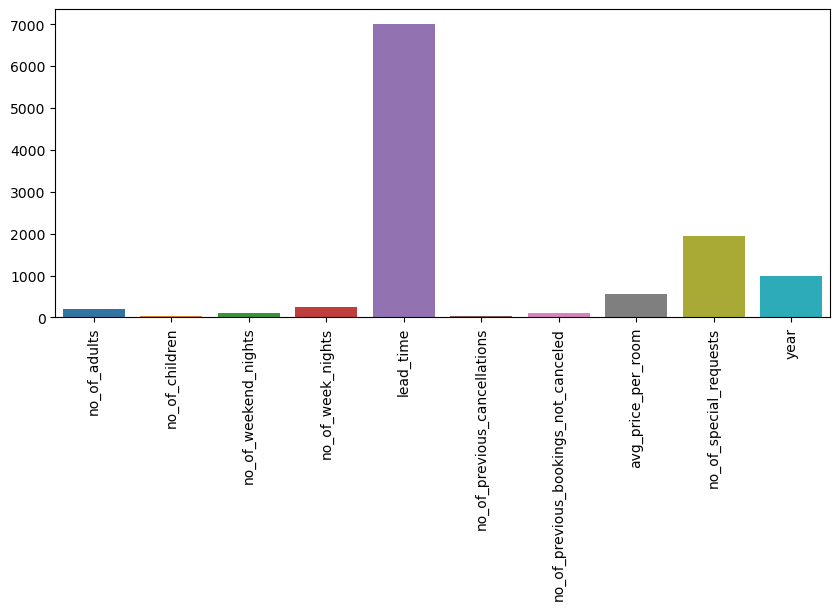

In [130]:
# scores for the features
names = []
values = []
for i in range(len(fs.scores_)):
    names.append(X_train_num.columns[i])
    values.append(fs.scores_[i])
f_list = zip(names, values)

# plot the scores
plt.figure(figsize=(10,4))
sns.barplot(x=names, y=values)
plt.xticks(rotation = 90)
plt.show()

In [131]:
X_train_cat = X_train.iloc[:, 10:]
#X_train_cat.info()

In [139]:
fs = SelectKBest(score_func=chi2, k=12)
fs.fit(X_train_cat, y_train)

SelectKBest(k=12, score_func=<function chi2 at 0x000001848DB86550>)

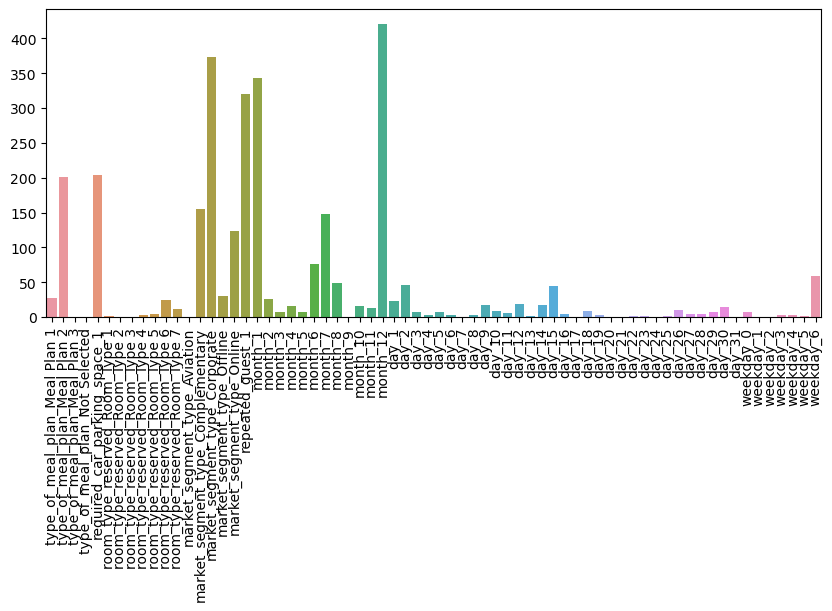

In [133]:
# scores for the features
names = []
values = []
for i in range(len(fs.scores_)):
    names.append(X_train_cat.columns[i])
    values.append(fs.scores_[i])
f_list = zip(names, values)

# plot the scores
plt.figure(figsize=(10,4))
sns.barplot(x=names, y=values)
plt.xticks(rotation = 90)
plt.show()

In [140]:
features_select_cat = fs.get_feature_names_out()

In [145]:
features_select = list(features_select_num) + list(features_select_cat)
features_select

['no_of_adults',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'lead_time',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests',
 'year',
 'type_of_meal_plan_Meal Plan 2',
 'required_car_parking_space_1',
 'market_segment_type_Complementary',
 'market_segment_type_Corporate',
 'market_segment_type_Online',
 'repeated_guest_1',
 'month_1',
 'month_6',
 'month_7',
 'month_8',
 'month_12',
 'weekday_6']

In [146]:
X_test = pd.DataFrame(ct.transform(X_test_raw), columns = ct.get_feature_names_out())

In [148]:
X_train_sel = X_train[features_select]
X_test_sel = X_test[features_select]

In [152]:
model = LogisticRegression(random_state=2023, max_iter=1000, class_weight='balanced', n_jobs=-1)
model.fit(X_train_sel, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1,
                   random_state=2023)

In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=100) 
model = LogisticRegression(penalty='elasticnet', solver='saga', random_state=2023, max_iter=1000, class_weight='balanced')

C_range = [0.1, 0.33, 1.0, 3.3, 10]
l1_ratio_range = [0, 0.01, 0.033, 0.1, 0.33, 1]
grid = dict()
grid['C'] = C_range
grid['l1_ratio'] = l1_ratio_range

search = GridSearchCV(model, param_grid = grid, scoring = 'roc_auc', \
                      cv = skf, n_jobs = -1, error_score = np.NaN).fit(X_train_sel, y_train)

search_lr_save = search

In [217]:
search = search_lr_save

In [218]:
print('ROC-AUC: %.5f' % search.best_score_)
print('Config: %s' % search.best_params_)

ROC-AUC: 0.86942
Config: {'C': 0.33, 'l1_ratio': 0.1}


In [168]:
search.cv_results_

{'mean_fit_time': array([ 2.81338124,  3.64069648,  3.73333158,  3.51930075,  3.23808241,
         4.1219852 ,  6.30605307,  8.31023607,  8.37858868,  8.47903986,
         9.28066359,  9.59483051, 12.93861966, 18.19993529, 18.26462317,
        18.71574888, 20.25383492, 21.33285117, 17.47470179, 22.69419265,
        22.55857539, 22.48003631, 22.73187242, 21.38394289, 17.20701418,
        22.6197813 , 22.3072206 , 22.70895023, 19.91935964, 13.8413084 ]),
 'std_fit_time': array([0.20296135, 0.11772976, 0.23662432, 0.13626323, 0.07050408,
        0.48059836, 0.18295725, 0.33323519, 0.20966887, 0.27772335,
        0.38033711, 1.97431027, 0.55992856, 0.96530499, 0.97266098,
        1.00302065, 0.98111616, 0.57841779, 0.36625674, 0.34107224,
        0.22697711, 0.09065903, 0.24528622, 0.04294466, 0.22329738,
        0.20021356, 0.39110943, 0.29941245, 1.9655029 , 0.70780948]),
 'mean_score_time': array([0.00443134, 0.00625052, 0.00533061, 0.00745416, 0.00633454,
        0.00814719, 0.        

In [165]:
model = search

In [210]:
model = search_lr_save

In [180]:
y_train_pred = model.predict(X_train_sel)
y_test_pred = model.predict(X_test_sel)

target_names = ['Not cancelling', 'Cancelling']
print('Train report')
print(classification_report(y_train, y_train_pred, target_names=target_names))
print('Test report')
print(classification_report(y_test, y_test_pred, target_names=target_names))

Train report
                precision    recall  f1-score   support

Not cancelling       0.88      0.79      0.83     19512
    Cancelling       0.64      0.77      0.70      9508

      accuracy                           0.78     29020
     macro avg       0.76      0.78      0.76     29020
  weighted avg       0.80      0.78      0.79     29020

Test report
                precision    recall  f1-score   support

Not cancelling       0.87      0.78      0.83      4878
    Cancelling       0.63      0.77      0.69      2377

      accuracy                           0.78      7255
     macro avg       0.75      0.77      0.76      7255
  weighted avg       0.79      0.78      0.78      7255



In [181]:
y_train_proba = model.predict_proba(X_train_sel)
y_test_proba = model.predict_proba(X_test_sel)

print('Train ROC-AUC')
print(roc_auc_score(y_train, y_train_proba[:, 1]))

print('Test ROC-AUC')
print(roc_auc_score(y_test, y_test_proba[:, 1]))

Train ROC-AUC
0.8698257977399925
Test ROC-AUC
0.865579802201051


In [183]:
print('Train confusion matrix')
print(confusion_matrix(y_train, y_train_pred))
print('Test confusion matrix')
confusion_matrix(y_test, y_test_pred)

Train confusion matrix
[[15350  4162]
 [ 2170  7338]]
Test confusion matrix


array([[3821, 1057],
       [ 556, 1821]], dtype=int64)

Text(0.5, 0, 'precision')

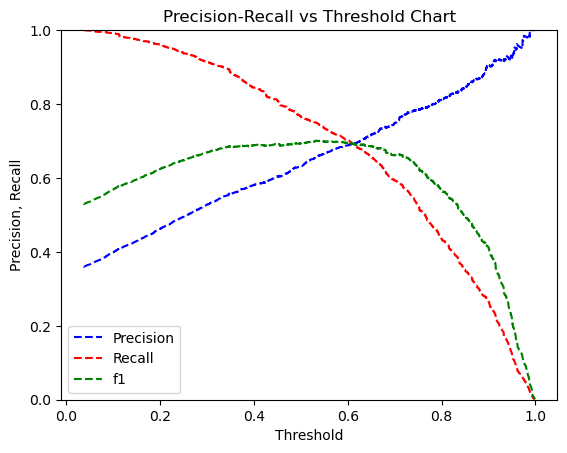

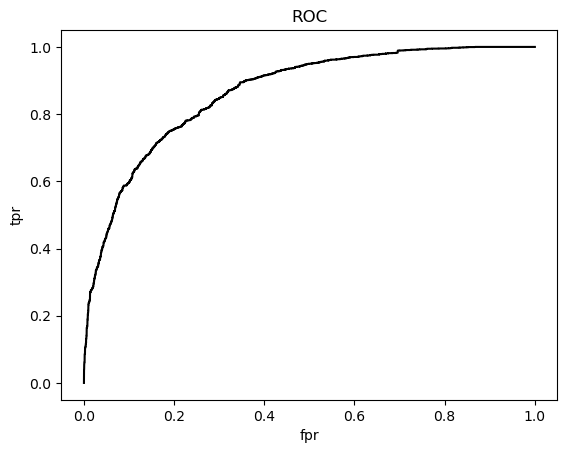

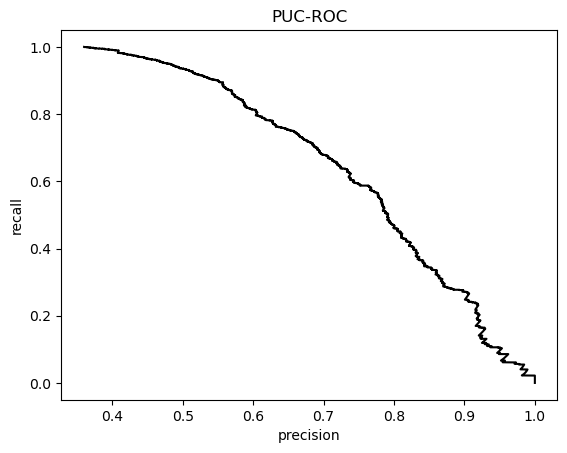

In [184]:
from sklearn.metrics import precision_recall_curve
from sklearn import metrics

precision, recall, thresholds = precision_recall_curve(y_test, y_test_proba[:,1]) 

plt.figure()
plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.plot(thresholds, (2* recall[: -1] * precision[: -1]) / (recall[: -1] + precision[: -1]) , "g--", label="f1")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_proba[:, 1], pos_label=1)

plt.figure()
plt.title("ROC")
plt.plot(fpr, tpr, "k")
plt.ylabel("tpr")
plt.xlabel("fpr")

plt.figure()
plt.title("PUC-ROC")
plt.plot(precision, recall, "k")
plt.ylabel("recall")
plt.xlabel("precision")


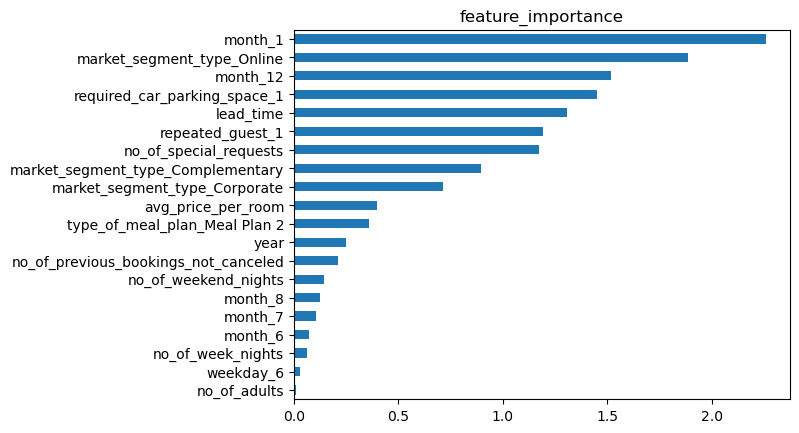

In [213]:
feature_importance = pd.Series(model.best_estimator_.coef_[0], index = X_train_sel.columns)
feature_importance = feature_importance.map(lambda x: abs(x))
feature_importance.sort_values(ascending=False, inplace=True)
ax1 = feature_importance.plot(kind='barh', title='feature_importance')
ax1.invert_yaxis()

In [185]:
model = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split= 5, min_samples_leaf=5, \
                                            max_features=0.9, random_state=2023, class_weight='balanced', n_jobs=-1)

model.fit(X_train_sel, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15, max_features=0.9,
                       min_samples_leaf=5, min_samples_split=5, n_jobs=-1,
                       random_state=2023)

In [190]:


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=100) 
model = RandomForestClassifier(n_estimators=100, random_state=2023, class_weight='balanced', n_jobs=-1)



max_depths = range(10, 20)
min_samples_leaf = [5] #range(1,9)
max_features = [0.7] #[0.5, 0.7, 0.9]

grid = dict()
grid['max_depth'] = max_depths
#grid['min_samples_split'] = min_samples_splits 
grid['min_samples_leaf'] = min_samples_leaf
grid['max_features'] = max_features 

search = GridSearchCV(model, param_grid = grid, scoring = 'roc_auc', \
                      cv = skf, n_jobs = -1, error_score = np.NaN).fit(X_train_sel, y_train)

search_rfc_save = search

In [191]:
print('roc_auc: %.5f' % search.best_score_)
print('Config: %s' % search.best_params_)

MAE: 0.94779
Config: {'max_depth': 18, 'max_features': 0.7, 'min_samples_leaf': 5}


In [192]:
from sklearn.ensemble import RandomForestClassifier

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=100) 
model = RandomForestClassifier(n_estimators=100, random_state=2023, class_weight='balanced', n_jobs=-1)

max_depths = range(1, 22)
min_samples_leaf = range(1,9)
max_features = [0.3 0.5, 0.7, 0.9]
grid = dict()
grid['max_depth'] = max_depths
grid['min_samples_leaf'] = min_samples_leaf
grid['max_features'] = max_features 

search = GridSearchCV(model, param_grid = grid, scoring = 'roc_auc', \
                      cv = skf, n_jobs = -1, error_score = np.NaN).fit(X_train_sel, y_train)

search_rfc_save = search

In [226]:
search = search_rfc_save

In [227]:
print('ROC-AUC: %.5f' % search.best_score_)
print('Config: %s' % search.best_params_)

ROC-AUC: 0.95023
Config: {'max_depth': 20, 'max_features': 0.5, 'min_samples_leaf': 3}


In [194]:
search.cv_results_

{'mean_fit_time': array([1.87288756, 4.08023252, 4.21681008, 3.1585958 , 2.24857602,
        3.69251986, 3.50686226, 3.70489511, 5.03682132, 3.89949002,
        4.60985761, 4.54445953, 5.61163211, 5.38152857, 5.27035437,
        3.81031151, 5.95998096, 6.21320992, 4.64686084, 2.78837962,
        3.32223859, 3.92870846, 3.08318591, 3.54553118, 4.11766844,
        4.12583365, 4.19815297, 3.63295479, 5.06595736, 5.03162231,
        4.77531366, 5.04720778, 5.41293473, 4.76428523, 4.61679792,
        5.84636917, 3.80568609, 2.64514084, 4.31228228, 3.94683666,
        3.1831975 , 3.94740152, 4.62857232, 5.12626324, 4.93899298,
        4.98900156, 4.71017857, 4.34892282, 5.6997026 , 5.98606687,
        5.9832952 , 5.40498443, 5.6155571 , 5.32751336, 3.83507285,
        3.76425562, 3.70236549, 3.6609539 , 3.67446947, 3.63337617,
        3.75216846, 4.39653926, 4.83797679, 4.17569122, 4.69244356,
        4.21125331, 4.53990331, 5.7722723 , 6.05582252, 4.81088729,
        5.7868556 , 5.47273645,

In [224]:
model = search_rfc_save

In [197]:
y_train_pred = model.predict(X_train_sel)
y_test_pred = model.predict(X_test_sel)

target_names = ['Not cancelling', 'Cancelling']
print('Train report')
print(classification_report(y_train, y_train_pred, target_names=target_names))

print('Test report')
print(classification_report(y_test, y_test_pred, target_names=target_names))

print('Train confusion matrix')
print(confusion_matrix(y_train, y_train_pred))

print('Test confusion matrix')
print(confusion_matrix(y_test, y_test_pred))


Train report
                precision    recall  f1-score   support

Not cancelling       0.95      0.94      0.95     19512
    Cancelling       0.88      0.90      0.89      9508

      accuracy                           0.93     29020
     macro avg       0.92      0.92      0.92     29020
  weighted avg       0.93      0.93      0.93     29020

Test report
                precision    recall  f1-score   support

Not cancelling       0.92      0.91      0.92      4878
    Cancelling       0.83      0.83      0.83      2377

      accuracy                           0.89      7255
     macro avg       0.87      0.87      0.87      7255
  weighted avg       0.89      0.89      0.89      7255

Train confusion matrix
[[18377  1135]
 [  917  8591]]
Test confusion matrix
[[4461  417]
 [ 395 1982]]


In [229]:
y_train_proba = model.predict_proba(X_train_sel)
y_test_proba = model.predict_proba(X_test_sel)

print('Train ROC-AUC')
print(roc_auc_score(y_train, y_train_proba[:, 1]))

print('Test ROC-AUC')
print(roc_auc_score(y_test, y_test_proba[:, 1]))

Train ROC-AUC
0.9857033682216292
Test ROC-AUC
0.950571651278145


Text(0.5, 0, 'precision')

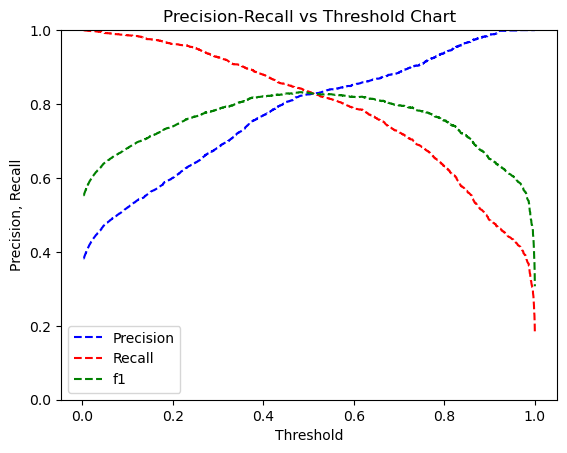

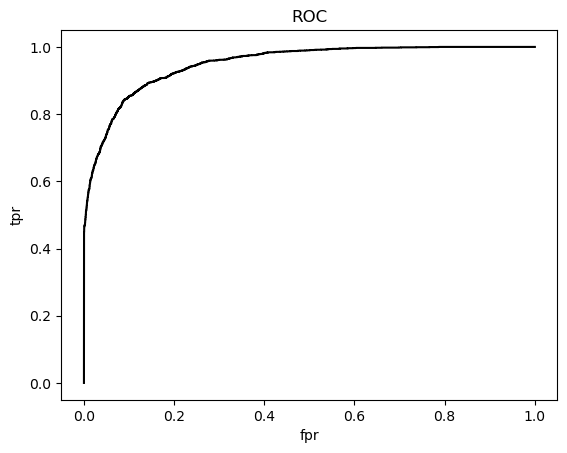

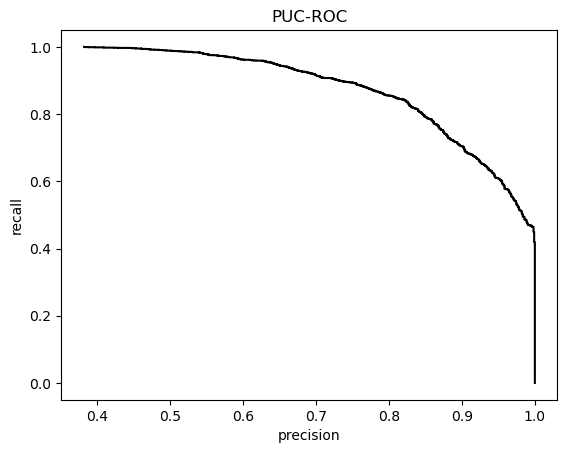

In [199]:
precision, recall, thresholds = precision_recall_curve(y_test, y_test_proba[:,1]) 

plt.figure()
plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.plot(thresholds, (2* recall[: -1] * precision[: -1]) / (recall[: -1] + precision[: -1]) , "g--", label="f1")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_proba[:, 1], pos_label=1)

plt.figure()
plt.title("ROC")
plt.plot(fpr, tpr, "k")
plt.ylabel("tpr")
plt.xlabel("fpr")

plt.figure()
plt.title("PUC-ROC")
plt.plot(precision, recall, "k")
plt.ylabel("recall")
plt.xlabel("precision")

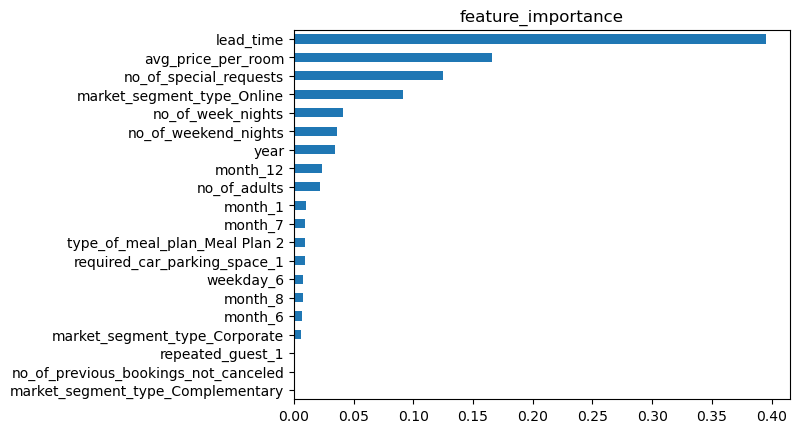

In [209]:
feature_importance = pd.Series(model.best_estimator_.feature_importances_, index = X_train_sel.columns)
feature_importance = feature_importance.map(lambda x: abs(x))
feature_importance.sort_values(ascending=False, inplace=True)
ax1 = feature_importance.plot(kind='barh', title='feature_importance')
ax1.invert_yaxis()

1. Why this project is important? What problem are you trying to solve?

2. How do you measure the model performance (metrics)? What is the benchmark?

3. How is your model? Have achieved your goal? How to evaluate the business value of your model?

4. Any insights have you gotten from your model? Any actionable suggestions can you provide to your business partner?

5. What is the most challenging part in the project? How did you solve it? How will you futher improve your model if you get more resources and time.

Make sure that your work includes these parts:
1. **Pre-model Analysis**: process and visualize data; get insights of features and target.
2. **Problem Definition**: translate the business needs into machine learning problems; design metrics to measure model performance.
3. **Feature Engineering**: create features which might improve model performance.
4. **Modeling**: Model selection, feature elimination, validation, hyperparameter tuning.
5. **Post-model Analysis**: Model performance, feature importance, actionable suggestions to business.